In [ ]:
#Importando libs

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import seaborn as sns
import datetime

In [ ]:
#Arrumando problemas de importação do dataframe ou pra facilitar codigo

In [2]:
def fixDataframe(df):
    del df['Unnamed: 0']
    df['Data'] = df['Data'].apply(pd.to_datetime)
    df['Preco R$'] = df['Preco R$'].str.replace('.','')
    df['Preco R$'] = df['Preco R$'].str.split(',').str[0]
    df['Preco'] = df['Preco R$']
    
    del df['Preco R$']
    df['Preco'] = df['Preco'].astype(float)
    return df

In [ ]:
#Importando dataframes

In [3]:
dfI = fixDataframe(pd.concat(map(pd.read_csv, glob.glob(os.path.join('C:\\Users\\Braulio\\Documents\\Python Scripts\\dados\\iphone', "*.csv")))))
dfS = fixDataframe(pd.concat(map(pd.read_csv, glob.glob(os.path.join('C:\\Users\\Braulio\\Documents\\Python Scripts\\dados\\samsung', "*.csv")))))
dfX = fixDataframe(pd.concat(map(pd.read_csv, glob.glob(os.path.join('C:\\Users\\Braulio\\Documents\\Python Scripts\\dados\\xiaomi', "*.csv")))))

In [ ]:
#Função plot media de preço ao longo dos dias

In [6]:
def plotMean(df):
    
    plt.plot(df.groupby(df.Data.dt.date).mean(), color='Blue')
    plt.xticks(rotation=90)
    plt.title(df['Item'].iloc[0])
    plt.ylabel('Média de Preço R$')
    plt.xlabel('Data')
    plt.show()
    
    return plt

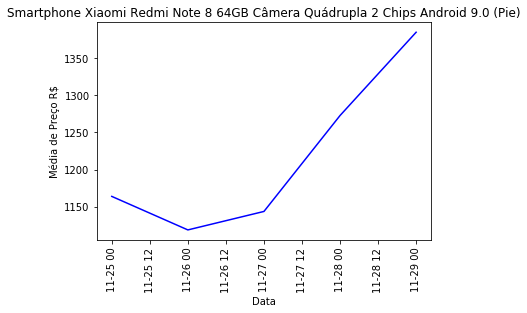

In [7]:
pltX = plotMean(dfX)

In [36]:
def plotBoxhist(df):
    sns.boxplot(y='Preco', x=df.Data.dt.date, 
                     data=df, 
                     width=0.5,
                     palette="colorblind",
                     showmeans=True)
    sns.pointplot(y='Preco', x=df.Data.dt.date, data=df, ci=None, color='black')
    plt.xticks(rotation=90)
    plt.title(df['Item'].iloc[0])
    plt.ylabel('Preço')
    plt.xlabel('Data')
    plt.show()
    
    return plt

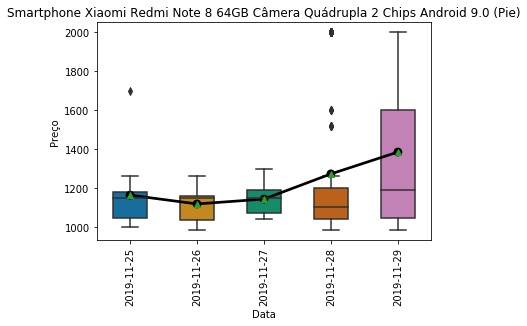

In [38]:
boxI = plotBoxhist(dfX)

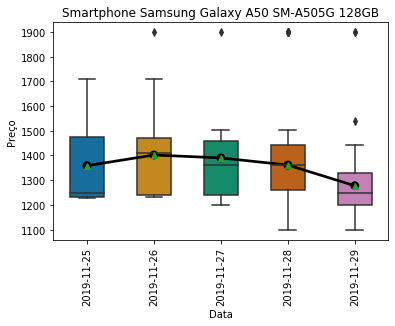

In [39]:
boxS = plotBoxhist(dfS)

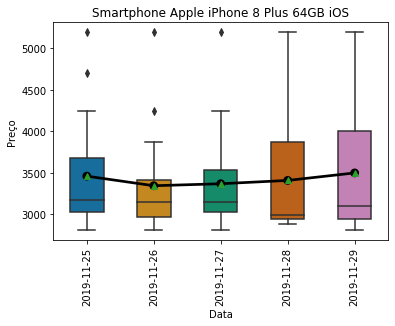

In [65]:
boxI = plotBoxhist(dfI)

In [64]:
def scatterPlot(df):
    plt.scatter(x='Preco',y='Loja',data = df)
    plt.show()
    
    
    return plt